In [ ]:
"""
First, load the file.
"""

from google.colab import files
uploaded = files.upload()

import pandas as pd
import copy
import matplotlib.pylab as plt

# Load the data
sysmon_data = pd.read_csv('tidy_sysmon_data.csv')

Saving tidy_sysmon_data.csv to tidy_sysmon_data.csv


In [ ]:
"""
This calculates the frequencies of how often a PID occurs. This information isn't really as significant as I anticipated, as PIDs get recycled
and don't always pertain to the same process name.
"""

pid_map = dict()
pid_freq = dict()

for index, row in sysmon_data.iterrows():
  if not row.OriginalFileName:
    print(row.Image)
  if row.ProcessId is None:
    continue
  if not row.ProcessId in pid_map:
    pid_map[row.ProcessId] = row.OriginalFileName
    if pd.isna(row.OriginalFileName):
      pid_map[row.ProcessId] = row.Image.split('\\')[-1]
  pid_freq[row.ProcessId] = pid_freq.get(row.ProcessId, 0) + 1

print(pid_map)
print(pid_freq)

{22008: 'Teams.exe', 15184: 'chrome.exe', 16472: 'chrome.exe', 23292: 'wsqmcons.exe', 25348: 'chrome.exe', 19468: 'svchost.exe', 4704: 'svchost.exe', 19824: 'Teams.exe', 8600: 'Wmiprvse.exe', 8796: 'svchost.exe', 20528: 'Teams.exe', 22608: 'svchost.exe', 15632: 'RuntimeBroker.exe', 9348: 'backgroundTaskHost.exe', 25316: 'RuntimeBroker.exe', 8092: 'backgroundTaskHost.exe', 8060: 'svchost.exe', 20440: 'chrome.exe', 3092: 'chrome.exe', 10440: 'Teams.exe', 21112: 'backgroundTaskHost.exe', 18508: 'Wmiprvse.exe', 18780: 'Teams.exe', 2376: 'backgroundTaskHost.exe', 2948: 'backgroundTaskHost.exe', 23268: 'svchost.exe', 14456: 'RuntimeBroker.exe', 3992: 'backgroundTaskHost.exe', 12956: 'Wmiprvse.exe', 3336: 'G2M.exe', 19312: 'FileCoAuth.exe', 3016: 'Teams.exe', 12240: 'chrome.exe', 23860: 'chrome.exe', 18008: 'Teams.exe', 4400: 'Wmiprvse.exe', 21132: 'RuntimeBroker.exe', 18132: 'RuntimeBroker.exe', 10664: 'backgroundTaskHost.exe', 20708: 'backgroundTaskHost.exe', 15416: 'msedgeupdate.dll', 1726

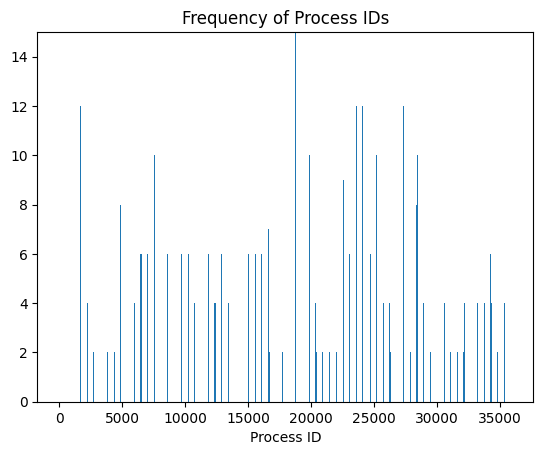

In [ ]:
plt.bar(*zip(*pid_freq.items()))

plt.xlabel("Process ID")
plt.ylim(0, 15)
plt.title("Frequency of Process IDs")

plt.show()

In [ ]:
"""
Reads and saves the start directory and CWD in a tuple. The initial directory is parsed from
the commandline arguments, which aren't always perfect, so outliers were ignored.
"""
import os

start_to_cwd = list()

for index, row in sysmon_data.iterrows():
  if pd.isna(row.CommandLine) or pd.isna(row.CurrentDirectory):
    continue

  initdir = ""
  if row.CommandLine[0] == "\"":
    initdir = '\\'.join(row.CommandLine.split("\"")[1].split('\\')[0:-1])
  else:
    initdir = os.path.dirname(row.CommandLine.split(' ')[0].replace('\\??\\', ''))

  # Needed to make sure paths are consistent.
  if not initdir.endswith('\\'):
    initdir += '\\'

  if initdir and len(initdir) > 1:
    start_to_cwd.append((os.path.normpath(initdir), os.path.normpath(row.CurrentDirectory)))
    print(start_to_cwd[-1])

Streaming output truncated to the last 5000 lines.
('C:\\WINDOWS\\system32\\', 'C:\\WINDOWS\\SystemApps\\MicrosoftWindows.Client.CBS_cw5n1h2txyewy\\')
('C:\\Users\\Floater\\AppData\\Local\\Microsoft\\Teams\\current\\', 'C:\\Users\\Floater\\AppData\\Local\\Microsoft\\Teams\\current\\')
('C:\\Program Files (x86)\\Microsoft\\EdgeUpdate\\', 'C:\\WINDOWS\\system32\\')
('C:\\Users\\Floater\\AppData\\Local\\Microsoft\\Teams\\current\\', 'C:\\Users\\Floater\\AppData\\Local\\Microsoft\\Teams\\current\\')
('C:\\Program Files\\Microsoft OneDrive\\23.214.1015.0001\\', 'C:\\WINDOWS\\system32\\')
('C:\\Program Files (x86)\\Google\\Chrome\\Application\\', 'C:\\Program Files (x86)\\Google\\Chrome\\Application\\119.0.6045.106\\')
('C:\\Program Files (x86)\\Google\\Chrome\\Application\\', 'C:\\Program Files (x86)\\Google\\Chrome\\Application\\119.0.6045.106\\')
('C:\\WINDOWS\\System32\\DriverStore\\FileRepository\\hpanalyticscomp.inf_amd64_43e3600968234e87\\x64\\Provider Data Sources\\_Shared\\DiskCheck

{True: 2704, False: 7140}


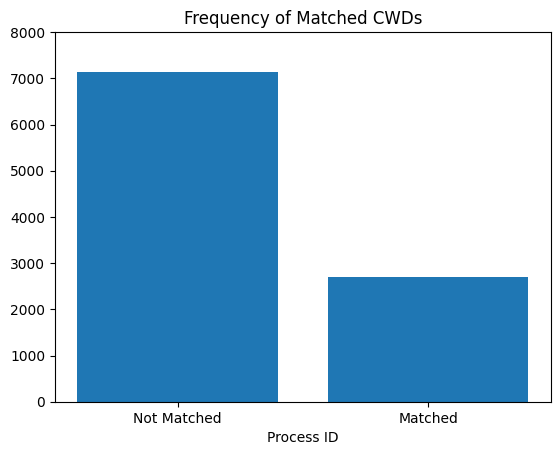

In [ ]:
matched_cwd_freq = dict()

for dir in start_to_cwd:
  matches = dir[0] == dir[1]
  matched_cwd_freq[matches] = matched_cwd_freq.get(matches, 0) + 1

print(matched_cwd_freq)

plt.bar(*zip(*matched_cwd_freq.items()))

plt.xlabel("Process ID")
plt.ylim(0, 8000)
plt.title("Frequency of Matched CWDs")
plt.xticks([0, 1], ['Not Matched', 'Matched'])

plt.show()

14413 14356


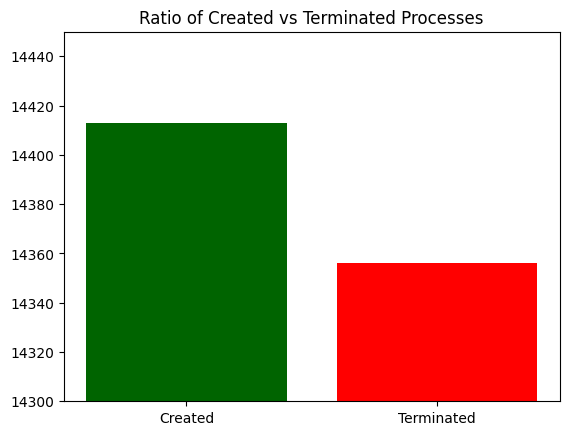

In [ ]:
created = 0
terminated = 0

for index, row in sysmon_data.iterrows():
  if row.Event_ID == 5:
    created += 1
  elif row.Event_ID == 1:
    terminated += 1

print(created, terminated)

plt.bar(['Created', 'Terminated'], [created, terminated], color = ['darkgreen', 'red'])

plt.ylim(14300, 14450)
plt.title("Ratio of Created vs Terminated Processes")

plt.show()

[('chrome.exe', 5611), ('backgroundTaskHost.exe', 4154), ('Teams.exe', 3886), ('svchost.exe', 2331), ('RuntimeBroker.exe', 2276), ('WmiPrvSE.exe', 1453), ('conhost.exe', 752), ('FileCoAuth.exe', 700), ('LocationNotificationWindows.exe', 684), ('msedge.exe', 642), ('TrustedInstaller.exe', 374), ('TiWorker.exe', 368), ('GoogleUpdate.exe', 282), ('taskhostw.exe', 267), ('dllhost.exe', 265), ('MicrosoftEdgeUpdate.exe', 251), ('E_YUBSWE.EXE', 196), ('E_YTSSWE.EXE', 196), ('msedgewebview2.exe', 193), ('SearchProtocolHost.exe', 176), ('OfficeC2RClient.exe', 168), ('SearchFilterHost.exe', 162), ('ETD_GetSMART.exe', 160), ('sppsvc.exe', 150), ('BackgroundTransferHost.exe', 138), ('schtasks.exe', 134), ('wermgr.exe', 124), ('ProcInfo.exe', 120), ('g2mupdate.exe', 114), ('SDXHelper.exe', 104), ('audiodg.exe', 99), ('MpCmdRun.exe', 90), ('HxTsr.exe', 80), ('CompatTelRunner.exe', 80), ('BackgroundDownload.exe', 78), ('ngen.exe', 70), ('HPSAAppLauncher.exe', 64), ('BridgeCommunication.exe', 63), ('D

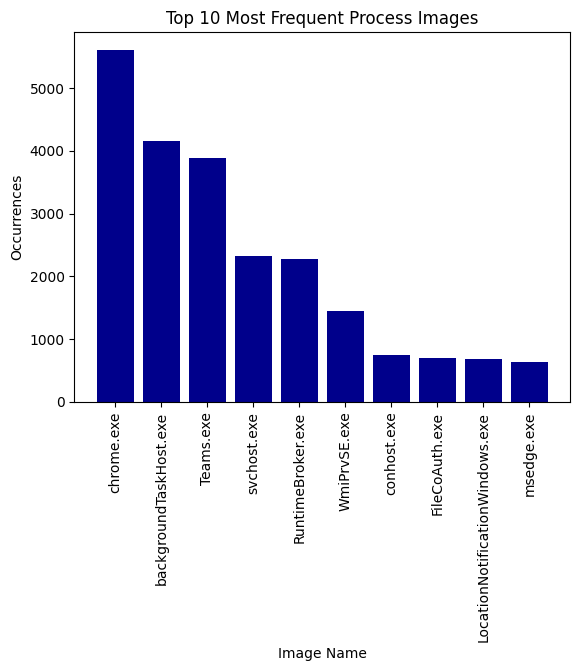

In [ ]:
image_freq = dict()

for index, row in sysmon_data.iterrows():
  if not row.Image:
    continue
  name = row.Image.split('\\')[-1]
  image_freq[name] = image_freq.get(name, 0) + 1

converted = list(image_freq.items())
data = sorted(converted, key=lambda tup: tup[1], reverse = True)

vals = list()
ticks = list()
for i in range(10):
  ticks.append(data[i][0])
  vals.append(data[i][1])

print(data)

plt.bar(ticks, vals, color = 'darkblue')

plt.title("Top 10 Most Frequent Process Images")
plt.xlabel("Image Name")
plt.ylabel("Occurrences")
plt.xticks(rotation=90)

plt.show()

{'11/14/2023 16': 1038, '11/14/2023 15': 411, '11/14/2023 14': 489, '11/14/2023 12': 371, '11/14/2023 11': 717, '11/14/2023 10': 298, '11/14/2023 9': 673, '11/14/2023 8': 332, '11/13/2023 22': 33, '11/13/2023 21': 502, '11/13/2023 20': 420, '11/13/2023 19': 784, '11/13/2023 18': 371, '11/13/2023 17': 520, '11/13/2023 13': 31, '11/13/2023 12': 423, '11/13/2023 8': 321, '11/13/2023 7': 360, '11/13/2023 6': 388, '11/13/2023 5': 344, '11/13/2023 4': 444, '11/13/2023 3': 370, '11/13/2023 2': 336, '11/13/2023 1': 372, '11/13/2023 0': 356, '11/12/2023 23': 347, '11/12/2023 22': 513, '11/12/2023 21': 627, '11/12/2023 20': 551, '11/12/2023 19': 715, '11/12/2023 18': 446, '11/12/2023 17': 356, '11/12/2023 16': 336, '11/12/2023 15': 418, '11/12/2023 14': 426, '11/12/2023 13': 715, '11/12/2023 12': 494, '11/12/2023 11': 678, '11/12/2023 10': 841, '11/12/2023 9': 308, '11/11/2023 22': 344, '11/11/2023 21': 534, '11/11/2023 20': 597, '11/11/2023 17': 821, '11/10/2023 20': 149, '11/10/2023 19': 165, 

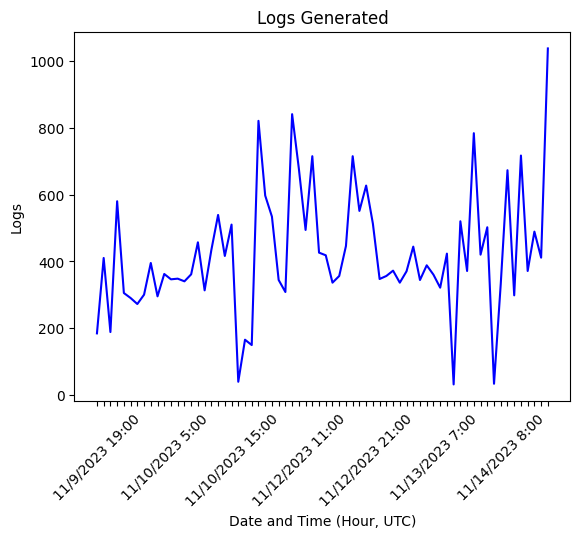

In [ ]:
log_freq = dict()

for index, row in sysmon_data.iterrows():
  name = row.Date_and_Time[0:row.Date_and_Time.index(':')] # Lazy method to grap the date & time
  log_freq[name] = log_freq.get(name, 0) + 1

print(log_freq)
x = list(log_freq.keys())
y = list(log_freq.values())
x.reverse()
y.reverse()
x = list(map(lambda timestamp: timestamp + ':00', x))

plt.plot(x, y, color='blue')

plt.title("Logs Generated")
plt.xlabel("Date and Time (Hour, UTC)")
plt.ylabel("Logs")
plt.xticks(rotation=45)

ax = plt.gca()
index = 0
for label in ax.get_xaxis().get_ticklabels():
  label.set_visible(index % 10 == 0)
  index += 1

plt.show()